# Machine Learning Model to Predict MPG!

## Load the data

In [2]:
# import the pandas module for flexible visualization and organization
import pandas as pd

# Highlight the current path to the .xlsx file in the file explorer (Excel Spreadsheet in XML format)
path = r'c:\Users\leone\OneDrive\Desktop\Vito\Work\Excel\Practice\Kaggle\Car Information Dataset\Automobile.xlsx'

# Index of the Data Spreadsheet
data_table: int = 8

# Create a DataFrame
df = pd.read_excel(path, sheet_name=data_table, engine='openpyxl')
df

,name,mpg,cylinders,displacement,horsepower,weight,Power-to-Weight,acceleration,model_year,origin
0,bmw 2002,26.0,4,121.0,113,2234,0.050582,12.5,70,europe
1,saab 99e,25.0,4,104.0,95,2375,0.040000,17.5,70,europe
2,audi 100 ls,24.0,4,107.0,90,2430,0.037037,14.5,70,europe
3,peugeot 504,25.0,4,110.0,87,2672,0.032560,17.5,70,europe
4,volkswagen 1131 deluxe sedan,26.0,4,97.0,46,1835,0.025068,20.5,70,europe
...,...,...,...,...,...,...,...,...,...,...
387,ford ranger,28.0,4,120.0,79,2625,0.030095,18.6,82,usa
388,plymouth horizon miser,38.0,4,105.0,63,2125,0.029647,14.7,82,usa
389,ford granada l,22.0,6,232.0,112,2835,0.039506,14.7,82,usa
390,buick century limited,25.0,6,181.0,110,2945,0.037351,16.4,82,usa


In [3]:
# Remove the first field and the Power-to-Weight from the DataFrame
df.drop(columns=['name', 'origin'], axis=1, inplace=True)
df.drop('Power-to-Weight', axis=1, inplace=True)

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,26.0,4,121.0,113,2234,12.5,70
1,25.0,4,104.0,95,2375,17.5,70
2,24.0,4,107.0,90,2430,14.5,70
3,25.0,4,110.0,87,2672,17.5,70
4,26.0,4,97.0,46,1835,20.5,70
...,...,...,...,...,...,...,...
387,28.0,4,120.0,79,2625,18.6,82
388,38.0,4,105.0,63,2125,14.7,82
389,22.0,6,232.0,112,2835,14.7,82
390,25.0,6,181.0,110,2945,16.4,82


## Prepare the Data

Obtain the `mpg` by assigning distinct variables where the `y` will store only the **mpg** and `x` keeps the entire DataFrame, but excluding the **mpg** column from it.

In [5]:
# Store the mpg field in the y variable
y = df['mpg']
y

0      26.0
1      25.0
2      24.0
3      25.0
4      26.0
       ... 
387    28.0
388    38.0
389    22.0
390    25.0
391    38.0
Name: mpg, Length: 392, dtype: float64

In [6]:
# Instantiate a reference to the df, but without the mpg and the name column in it
x = df.drop(columns=['mpg'], axis=1)
x

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,4,121.0,113,2234,12.5,70
1,4,104.0,95,2375,17.5,70
2,4,107.0,90,2430,14.5,70
3,4,110.0,87,2672,17.5,70
4,4,97.0,46,1835,20.5,70
...,...,...,...,...,...,...
387,4,120.0,79,2625,18.6,82
388,4,105.0,63,2125,14.7,82
389,6,232.0,112,2835,14.7,82
390,6,181.0,110,2945,16.4,82


Split the data into two different segments, such as the train and the test models:
- Training set -> 80% of data
- Test set -> 20% of data

In [7]:
# Make sure to import scikit-learn into the environment
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

Verify the training models.

In [8]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model_year
338,6,173.0,115,2595,11.3,79
328,8,318.0,140,3735,13.2,78
352,8,350.0,125,3900,17.4,79
372,8,350.0,105,3725,19.0,81
304,8,305.0,145,3880,12.5,77
...,...,...,...,...,...,...
343,6,232.0,90,3265,18.2,79
359,6,225.0,90,3381,18.7,80
323,6,232.0,90,3210,17.2,78
280,6,200.0,81,3012,17.6,76


In [9]:
x_test

,cylinders,displacement,horsepower,weight,acceleration,model_year
124,4,120.0,75,2542,17.5,80
140,4,91.0,68,1970,17.6,82
276,6,250.0,110,3645,16.2,76
252,6,232.0,100,2914,16.0,75
326,8,305.0,145,3425,13.2,78
...,...,...,...,...,...,...
233,8,400.0,150,4464,12.0,73
209,6,232.0,100,2789,15.0,73
187,8,400.0,175,5140,12.0,71
27,4,121.0,115,2671,13.5,75


## Model Building

We will build, train and generate possible predictions for the following models...

### Linear Regression

#### Training the Model

In [10]:
# Import the Linear Regression Function to train these models
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train) # Only train these models!

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Generate Predictions

In [11]:
# Run the predictions
y_lr_train_prediction = lr.predict(x_train)
y_lr_test_prediction = lr.predict(x_test)

#### Evaluate Model Performance

In [12]:
# Evaluate and compare the mpg data and their values
y_train

338    28.8
328    19.4
352    23.0
372    26.6
304    17.5
       ... 
343    20.2
359    19.1
323    19.4
280    24.0
8      27.0
Name: mpg, Length: 313, dtype: float64

In [13]:
y_lr_train_prediction # Retrieved precise values

array([27.88063582, 19.91769477, 20.31766061, 23.3200424 , 17.86194633,
       17.06665677, 25.21462158,  9.80684325,  9.58735734, 18.90417938,
       32.87086796, 20.68420498, 28.65077321, 26.49676433, 15.01790202,
       15.00524453, 26.91345243, 25.19568043, 25.68828002, 26.0586009 ,
       25.17909131, 20.06224272, 31.66662044, 27.58063052, 16.71905832,
       26.23772541, 32.48222358, 17.2833484 , 21.43424058, 28.44495605,
       33.37548731, 31.12174078, 28.42599502, 28.75519256, 28.26035031,
       25.73501614, 30.5981474 , 27.14936733, 28.78156274, 24.40150366,
       20.73102663, 30.33596645, 19.69296031, 25.00055774, 17.04452279,
       34.89998181, 28.83733536, 26.33310884, 20.71938173, 28.76574162,
       14.92604337, 21.92701515, 13.24021356, 30.75951711, 25.72886389,
       12.4480049 , 11.64801096, 24.29643513, 32.01282185, 26.20182007,
       16.61832634, 14.96597829, 26.28544656, 30.80955776,  9.75154693,
       28.79948678, 35.63017376, 16.67641958, 19.6156479 , 34.95

#### Calculate the Mean Squared Error and the Squared Correlation Coefficient

In [14]:
# Import the mean squared error and squared correlation coefficient methods
from sklearn.metrics import mean_squared_error, r2_score

# Results for the training set
lr_train_mse = mean_squared_error(y_train, y_lr_train_prediction)
lr_train_r2 = r2_score(y_train, y_lr_train_prediction)

# Results for the test set
lr_test_mse = mean_squared_error(y_test, y_lr_test_prediction)
lr_test_r2 = r2_score(y_test, y_lr_test_prediction)

##### Organize the Results 

In [15]:
# Extract the results into a DataFrame
df_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()

# Rename the columns
df_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [16]:
df_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,12.079235,0.807072,10.122839,0.808441


### Random Forest

#### Training the Model

While utilizing a distinct statistical technique, we will always execute the same prior steps from the previous statistical technique (Linear Regression).

In [17]:
# Import the Random Forest Regressor and go through all prior steps during construction
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)

rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Stimulate the Predictions

In [18]:
# Run more predictions...
y_rf_train_prediction = rf.predict(x_train)
y_rf_test_prediction = rf.predict(x_test)

#### Evaluate Another Model Performance

In [19]:
y_train

338    28.8
328    19.4
352    23.0
372    26.6
304    17.5
       ... 
343    20.2
359    19.1
323    19.4
280    24.0
8      27.0
Name: mpg, Length: 313, dtype: float64

In [20]:
y_rf_train_prediction

array([25.9511237 , 15.96942004, 18.40205073, 19.03954451, 14.5143294 ,
       18.61871465, 27.30023297, 14.21574491, 14.21574491, 19.05419816,
       33.33715429, 25.76130189, 30.64511803, 24.45351825, 16.02506145,
       16.1901714 , 26.68297441, 27.24933877, 25.76130189, 21.27252467,
       25.70830739, 21.25962704, 29.16463358, 27.22835707, 14.32412186,
       26.03661895, 32.14932627, 18.81615096, 21.70380986, 21.49496596,
       33.33715429, 33.01578789, 30.64511803, 30.64511803, 28.29251502,
       25.76130189, 28.3536894 , 30.48457476, 28.45333816, 25.76130189,
       19.2290832 , 28.88721624, 19.2290832 , 26.12835166, 19.2290832 ,
       33.33715429, 30.64511803, 26.47259731, 19.17117732, 26.41111086,
       14.76820758, 23.33956974, 14.21574491, 28.17971963, 30.64511803,
       14.21574491, 14.21574491, 24.83437757, 32.29894051, 23.93825079,
       18.81615096, 14.21574491, 26.53242239, 28.45333816, 14.21574491,
       27.21251564, 33.33715429, 14.65122842, 14.82611346, 33.33

#### Calculate MSE and R2

In [21]:
# Training set results
rf_train_mse = mean_squared_error(y_train, y_rf_train_prediction)
rf_train_r2 = r2_score(y_train, y_rf_train_prediction)

# Test set results
rf_test_mse = mean_squared_error(y_test, y_rf_test_prediction)
rf_test_r2 = r2_score(y_test, y_rf_test_prediction)

##### Organize the Final Results into the DF

In [22]:
# Extract the results into a DataFrame
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()

# Name each field correctly
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [23]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,12.445835,0.801217,7.52584,0.857585


## Model Comparison

Concatenate both the **linear regression** and the **random forest** DataFrames to simplify the model comparison.

In [24]:
# Merge both dfs into a singular model
df_models = pd.concat([df_results, rf_results], axis=0)

# Reset and remove the index field name highlighting the record indexes
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,12.079235,0.807072,10.122839,0.808441
1,Random Forest,12.445835,0.801217,7.52584,0.857585


In [25]:
# View statistics and retrieve formatted results
round(df_models.iloc[1]["Training MSE"], 2) # 12.45

12.45

In [26]:
df_models[df_models["Method"] == "Random Forest"]

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,12.445835,0.801217,7.52584,0.857585


### Construct the Scatter Plot Diagram for data visualization

We will build two diagrams for the `y_lr_train_prediction` and `y_rf_train_prediction` variables.

#### Predicted Linear Regression Graph

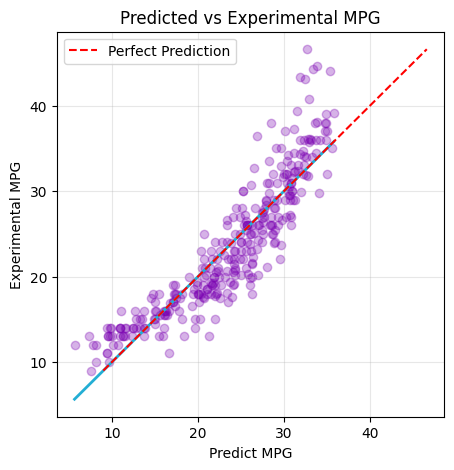

In [56]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Create the scatter plot diagram
plt.figure(figsize=(5, 5)) # Defined dimension
plt.scatter(y_lr_train_prediction, y_train, color='#7A00B2', alpha=0.3)

# Construct the trend line
z = np.polyfit(y_lr_train_prediction, y_train, 1) # Pass the coordinates and the support index
p = np.poly1d(z)

# Create points for smooth trend line
x_lr_trend = np.linspace(min(y_lr_train_prediction), max(y_lr_train_prediction), 50)
y_lr_trend = p(x_lr_trend)

# Label the X and Y-axis
plt.plot(x_lr_trend, y_lr_trend, "#23AED4", linewidth=2) # Hides the memory address of the graph and insert a color for the trend line
plt.xlabel('Predict MPG')
plt.ylabel('Experimental MPG')

# Add perfect prediction line for reference (y=x line)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 
         '--', color='red', label='Perfect Prediction')

plt.legend()
plt.title('Predicted vs Experimental MPG')
plt.grid(True, alpha=0.3)

plt.show()

#### Predicted Random Forest Graph

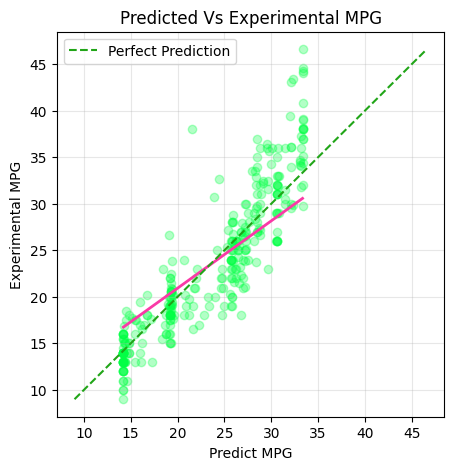

In [55]:
# Redo the prior steps, but replacing the predicted and trained variable to y_rf_train_prediction

# Build the graph
plt.figure(figsize=(5, 5))
plt.scatter(x=y_rf_train_prediction, y=y_train, color="#02FF45", alpha=0.3)

# Create a trend line
z = np.polyfit(y_train, y_rf_train_prediction, 1)
p = np.poly1d(z)

# Upgrade the trend line
x_rf_trend = np.linspace(min(y_rf_train_prediction), max(y_rf_train_prediction), 50)
y_rf_trend = p(x_rf_trend)

# Insert the labels
plt.plot(x_rf_trend, y_rf_trend, "#FA39A6", linewidth=2)
plt.xlabel('Predict MPG')
plt.ylabel('Experimental MPG')

# Perfect prediction reference
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color="#21A518A0", alpha=1, label='Perfect Prediction')

# Finishing touches
plt.legend()
plt.title("Predicted Vs Experimental MPG")
plt.grid(True, alpha=0.3)

plt.show()